# Loading and Exploring the Formula 1 Dataset

In this section, we will load the dataset containing Formula 1 race and pitstop data. We will first load the data from the provided Excel file, which includes two sheets: one for race data and one for pitstop data. Then, we will explore the structure of the data by displaying the first few rows and checking for any missing values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file
file_path =r'C:\Users\saumy\OneDrive\Documents\Desktop\F1-PREDICTION-\F1 Data 2013 - 2014.xlsx' 

# Load each sheet into a separate DataFrame
race_data = pd.read_excel(file_path, sheet_name='Race') # Load race data from the "Race" sheet
pitstop_data = pd.read_excel(file_path, sheet_name='Pitstop') # Load pitstop data from the "Pitstop" sheet

# Display the first few rows of each DataFrame to understand the structure
print("Race Data:")
print(race_data.head()) # Display the first five rows of the race data for an initial look at its structure

print("\nPitstop Data:")
print(pitstop_data.head()) # Display the first five rows of the race data for an initial look at its structure

# Get some basic information about the data
print("\nRace Data Information:")
print(race_data.info()) # Get an overview of the structure and data types in the race data

print("\nPitstop Data Information:")
print(pitstop_data.info())  # Get an overview of the structure and data types in the pitstop data

# Check for missing values
print("\nMissing Values in Race Data:") # Check how many missing values are present in each column of the race data
print(race_data.isnull().sum())

print("\nMissing Values in Pitstop Data:")
print(pitstop_data.isnull().sum()) # Check how many missing values are present in each column of the pitstop data

Race Data:
   Year                                  Grandprix Pos  No      Driver  \
0  2013  Albert Park Grand Prix Circuit, Australia   1   7   Räikkönen   
1  2013  Albert Park Grand Prix Circuit, Australia   2   3      Alonso   
2  2013  Albert Park Grand Prix Circuit, Australia   3   1      Vettel   
3  2013  Albert Park Grand Prix Circuit, Australia   4   4       Massa   
4  2013  Albert Park Grand Prix Circuit, Australia   5  10    Hamilton   

                       Car  Laps Time/retired   Pts  Status  
0            Lotus Renault  58.0     0.062537  25.0       0  
1                  Ferrari  58.0     +12.451s  18.0       1  
2  Red Bull Racing Renault  58.0     +22.346s  15.0       0  
3                  Ferrari  58.0     +33.577s  12.0       0  
4                 Mercedes  58.0     +45.561s  10.0       1  

Pitstop Data:
   Year                                  Grandprix  Stops  No      Driver  \
0  2013  Albert Park Grand Prix Circuit, Australia      1   5      Button   
1  

In [3]:
# Load each sheet into a separate DataFrame
race_data = pd.read_excel(file_path, sheet_name='Race') # Load race data from the "Race" sheet
pitstop_data = pd.read_excel(file_path, sheet_name='Pitstop') # Load pitstop data from the "Pitstop" sheet

# Display the first few rows of each DataFrame to understand the structure
print("Race Data:")
print(race_data.head()) # Display the first five rows of the race data for an initial look at its structure

print("\nPitstop Data:")
print(pitstop_data.head()) # Display the first five rows of the race data for an initial look at its structure

# Get some basic information about the data
print("\nRace Data Information:")
print(race_data.info()) # Get an overview of the structure and data types in the race data

print("\nPitstop Data Information:")
print(pitstop_data.info())  # Get an overview of the structure and data types in the pitstop data

# Check for missing values
print("\nMissing Values in Race Data:") # Check how many missing values are present in each column of the race data
print(race_data.isnull().sum())

print("\nMissing Values in Pitstop Data:")
print(pitstop_data.isnull().sum()) # Check how many missing values are present in each column of the pitstop data

Race Data:
   Year                                  Grandprix Pos  No      Driver  \
0  2013  Albert Park Grand Prix Circuit, Australia   1   7   Räikkönen   
1  2013  Albert Park Grand Prix Circuit, Australia   2   3      Alonso   
2  2013  Albert Park Grand Prix Circuit, Australia   3   1      Vettel   
3  2013  Albert Park Grand Prix Circuit, Australia   4   4       Massa   
4  2013  Albert Park Grand Prix Circuit, Australia   5  10    Hamilton   

                       Car  Laps Time/retired   Pts  Status  
0            Lotus Renault  58.0     0.062537  25.0       0  
1                  Ferrari  58.0     +12.451s  18.0       1  
2  Red Bull Racing Renault  58.0     +22.346s  15.0       0  
3                  Ferrari  58.0     +33.577s  12.0       0  
4                 Mercedes  58.0     +45.561s  10.0       1  

Pitstop Data:
   Year                                  Grandprix  Stops  No      Driver  \
0  2013  Albert Park Grand Prix Circuit, Australia      1   5      Button   
1  

In [4]:
# Combined Descriptive Statistics
print("\nDescriptive Statistics for Race Data:")
race_descriptive_stats = race_data.describe()
print(race_descriptive_stats)

print("\nDescriptive Statistics for Pitstop Data:")
pitstop_descriptive_stats = pitstop_data.describe()
print(pitstop_descriptive_stats)

race_descriptive_stats.to_csv('race_descriptive_statistics.csv')
pitstop_descriptive_stats.to_csv('pitstop_descriptive_statistics.csv')


Descriptive Statistics for Race Data:
              Year           No         Laps          Pts       Status
count  4819.000000  4819.000000  4816.000000  4819.000000  4819.000000
mean   2018.376012    25.401743    53.706603     4.958601     0.621498
std       3.394214    23.639969    17.688151     7.209800     0.485064
min    2013.000000     1.000000     0.000000     0.000000     0.000000
25%    2016.000000     8.000000    51.000000     0.000000     0.000000
50%    2018.000000    18.000000    56.000000     0.000000     1.000000
75%    2021.000000    31.000000    66.000000     8.000000     1.000000
max    2024.000000    99.000000    87.000000    50.000000     1.000000

Descriptive Statistics for Pitstop Data:
              Year        Stops           No          Lap  Time of day  \
count  9008.000000  9008.000000  9008.000000  9007.000000  9007.000000   
mean   2018.244893     1.746226    25.139099    25.031531     0.667664   
std       3.528497     0.932368    23.629967    15.112389 

## Data Cleaning and Transformation

In this step, we clean the data by handling missing values and ensuring that important columns are in the correct data types. Specifically, we:
1. Fill missing values in the `Laps` column of the race data with the column's mean.
2. Drop any rows with missing values from the pitstop data.
3. Convert the `Pos` (position) column to an integer, removing any rows where the position couldn't be converted to a valid number.
4. Ensure all columns are prepared for further analysis, such as time columns, if needed.

In [5]:
# For Race Data, drop or fill missing values in Laps
race_data['Laps'].fillna(race_data['Laps'].mean(), inplace=True)  # or drop rows with missing laps

# For Pitstop Data, drop the row with missing values
pitstop_data.dropna(inplace=True)

# Convert Pos to an integer in Race Data
race_data['Pos'] = pd.to_numeric(race_data['Pos'], errors='coerce')  # converting with coercion to handle any non-numeric entries
race_data.dropna(subset=['Pos'], inplace=True)  # Drop any rows where Pos couldn't be converted

# Check for any other necessary transformations (e.g., converting time columns)

## Data Type Adjustments

In this step, we ensure that the data types of each column in both the race and pitstop datasets are appropriate for further analysis. This involves converting certain columns, like `Pos`, `Laps`, `Year`, and others, to integer types where necessary. It's critical to ensure that numeric columns are in the correct format to avoid issues during calculations or model training.

Steps include:
1. Checking the current data types of both race and pitstop data.
2. Converting columns to the appropriate types (e.g., converting `Pos`, `Laps`, `Year`, etc. to integers).
3. Re-checking data types after conversions to ensure everything is in the desired format.

In [6]:
# Check the data types of Race Data
print("Data types in Race Data before adjustments:")
print(race_data.dtypes)

# Convert data types if necessary
race_data['Pos'] = race_data['Pos'].astype(int)

race_data['Laps'] = race_data['Laps'].astype(int)

race_data['Year'] = race_data['Year'].astype(int)

race_data['Pts'] = race_data['Pts'].astype(int)

race_data['Status'] = race_data['Status'].astype(int)

# Check for any remaining non-numeric columns that should be numeric
# If it's a time, we might need to parse it, but if it's text (like "Retired"), leave it as is.
# For now, let's leave it as an object if it contains mixed data.

# Re-check the data types after conversions
print("Data types in Race Data after adjustments:")
print(race_data.dtypes)

# For Pitstop Data, let's do a similar check
print("\nData types in Pitstop Data before adjustments:")
print(pitstop_data.dtypes)

# Convert 'Year' to integer if it's not already
pitstop_data['Year'] = pitstop_data['Year'].astype(int)

# Ensure 'Stops' is an integer
pitstop_data['Stops'] = pitstop_data['Stops'].astype(int)

# Convert 'Lap' to integer if appropriate
pitstop_data['Lap'] = pitstop_data['Lap'].astype(int)

# 'Time of day' is likely a float representing hours, so we can leave it as a float unless you want to change it
# 'Time' and 'Total' are already floats, which is appropriate

# Re-check the data types after conversions
print("Data types in Pitstop Data after adjustments:")
print(pitstop_data.dtypes)

Data types in Race Data before adjustments:
Year              int64
Grandprix        object
Pos             float64
No                int64
Driver           object
Car              object
Laps            float64
Time/retired     object
Pts             float64
Status            int64
dtype: object
Data types in Race Data after adjustments:
Year             int32
Grandprix       object
Pos              int32
No               int64
Driver          object
Car             object
Laps             int32
Time/retired    object
Pts              int32
Status           int32
dtype: object

Data types in Pitstop Data before adjustments:
Year             int64
Grandprix       object
Stops            int64
No               int64
Driver          object
Car             object
Lap            float64
Time of day    float64
Time           float64
Total          float64
dtype: object
Data types in Pitstop Data after adjustments:
Year             int32
Grandprix       object
Stops            int32
No      

## Handling Non-Numeric Values in 'Pos' Column

In this step, we address any non-numeric values present in the `Pos` (position) column, such as `DQ` (disqualified), `NC` (not classified), or `EX` (excluded). These entries can affect our analysis and model predictions.

Here, we chose to drop rows with NaN values for a cleaner dataset, and then convert the `Pos` column to integer type for further analysis.

In [7]:
# Replace non-numeric positions (e.g., DQ, NC, EX) with NaN
race_data['Pos'] = pd.to_numeric(race_data['Pos'], errors='coerce')

# Check how many rows have been converted to NaN
non_numeric_positions = race_data['Pos'].isna().sum()
print(f"Number of non-numeric positions replaced with NaN: {non_numeric_positions}")

# This option is suitable if these rows are not useful for your prediction model
race_data_cleaned = race_data.dropna(subset=['Pos'])

# Convert the Pos column to integer after handling NaNs
race_data_cleaned['Pos'] = race_data_cleaned['Pos'].astype(int)

# Verify the changes
print("Data types after cleaning Pos column:")
print(race_data_cleaned.dtypes)

Number of non-numeric positions replaced with NaN: 0
Data types after cleaning Pos column:
Year             int32
Grandprix       object
Pos              int32
No               int64
Driver          object
Car             object
Laps             int32
Time/retired    object
Pts              int32
Status           int32
dtype: object


In [8]:
# Eliminate drivers whose status is 0 (indicating they have retired and isn't an active driver)
race_data = race_data[race_data['Status'] != 0]

# Verify the changes
print("Data after removing drivers with Status 0:")
print(race_data['Status'].value_counts())  # This should now show only drivers with Status 1

Data after removing drivers with Status 0:
1    2587
Name: Status, dtype: int64


## Feature Engineering and Data Merging

This section focuses on engineering new features to enhance our dataset and performing necessary calculations to prepare the data for modeling. The steps include:
- Calculating how many years each driver has been active (driver experience).
- Creating rolling averages for recent performance metrics, such as average finishing position and average points scored in the last three races.
- Calculating the average pitstop time for each driver across the dataset.
- Merging new features like cumulative points and pitstop efficiency into the race data to form a comprehensive dataset for analysis and prediction.

In [9]:
# Calculate the number of years each driver has been active
driver_experience = race_data.groupby('Driver')['Year'].nunique().reset_index()
driver_experience.columns = ['Driver', 'Years_Active']

# Merge this back into the race data
race_data = pd.merge(race_data, driver_experience, on='Driver', how='left')

# Check the new feature
print(race_data[['Driver', 'Years_Active']].head())

      Driver  Years_Active
0     Alonso            10
1   Hamilton            12
2      Perez            12
3     Bottas            12
4   Hamilton            12


In [10]:
# Sort the race data by driver and year to facilitate rolling calculations
race_data = race_data.sort_values(by=['Driver', 'Year', 'Grandprix'])

# Calculate rolling average of finishing positions over the last 3 races
race_data['Avg_Pos_Last_3'] = race_data.groupby('Driver')['Pos'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

# Calculate rolling average of points over the last 3 races
race_data['Avg_Pts_Last_3'] = race_data.groupby('Driver')['Pts'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

# Check the new features
print(race_data[['Driver', 'Year', 'Grandprix', 'Avg_Pos_Last_3', 'Avg_Pts_Last_3']].head())

     Driver  Year                                          Grandprix  \
1681  Zhou   2022          Albert Park Grand Prix Circuit, Melbourne   
1699  Zhou   2022  Autodromo Internazionale Enzo e Dino Ferrari, ...   
1868  Zhou   2022                   Autodromo Nazionale Monza, Monza   
1926  Zhou   2022          Autódromo Hermanos Rodríguez, Mexico City   
1940  Zhou   2022              Autódromo José Carlos Pace, São Paulo   

      Avg_Pos_Last_3  Avg_Pts_Last_3  
1681       11.000000        0.000000  
1699       13.000000        0.000000  
1868       12.000000        0.333333  
1926       12.666667        0.333333  
1940       11.666667        0.333333  


In [11]:
# Calculate the average pitstop time for each driver across the entire dataset
avg_pitstop_time = pitstop_data.groupby('Driver')['Total'].mean().reset_index()
avg_pitstop_time.columns = ['Driver', 'Avg_Pitstop_Time']

# Merge this back into the race data
race_data = pd.merge(race_data, avg_pitstop_time, on='Driver', how='left')

# Check the new feature
print(race_data[['Driver', 'Avg_Pitstop_Time']].head())

  Driver  Avg_Pitstop_Time
0  Zhou          24.328542
1  Zhou          24.328542
2  Zhou          24.328542
3  Zhou          24.328542
4  Zhou          24.328542


In [12]:
# Calculate the cumulative points for each driver up to the current race in the season
race_data['Cumulative_Pts'] = race_data.groupby(['Driver', 'Year'])['Pts'].cumsum()

# Check the new feature
print(race_data[['Driver', 'Year', 'Grandprix', 'Cumulative_Pts']].head())

  Driver  Year                                          Grandprix  \
0  Zhou   2022          Albert Park Grand Prix Circuit, Melbourne   
1  Zhou   2022  Autodromo Internazionale Enzo e Dino Ferrari, ...   
2  Zhou   2022                   Autodromo Nazionale Monza, Monza   
3  Zhou   2022          Autódromo Hermanos Rodríguez, Mexico City   
4  Zhou   2022              Autódromo José Carlos Pace, São Paulo   

   Cumulative_Pts  
0               0  
1               0  
2               1  
3               1  
4               1  


In [13]:
# Merge pitstop data with race data to calculate pitstop efficiency
race_pitstop_data = pd.merge(race_data, pitstop_data.groupby(['Year', 'Grandprix', 'Driver'])['Total'].sum().reset_index(), on=['Year', 'Grandprix', 'Driver'], how='left')

# Calculate pitstop efficiency as total pitstop time per race
race_pitstop_data['Pitstop_Efficiency'] = race_pitstop_data['Total'] / race_pitstop_data['Laps']

# Check the new feature
print(race_pitstop_data[['Driver', 'Year', 'Grandprix', 'Pitstop_Efficiency']].head())

  Driver  Year                                          Grandprix  \
0  Zhou   2022          Albert Park Grand Prix Circuit, Melbourne   
1  Zhou   2022  Autodromo Internazionale Enzo e Dino Ferrari, ...   
2  Zhou   2022                   Autodromo Nazionale Monza, Monza   
3  Zhou   2022          Autódromo Hermanos Rodríguez, Mexico City   
4  Zhou   2022              Autódromo José Carlos Pace, São Paulo   

   Pitstop_Efficiency  
0            0.316897  
1            0.519403  
2            0.478604  
3            0.345971  
4            1.039085  


In [14]:
# Aggregate pitstop data by Driver, Year, and Grandprix
pitstop_summary = pitstop_data.groupby(['Year', 'Grandprix', 'Driver']).agg({
    'Total': 'sum',  # Total pitstop time
    'Stops': 'count',  # Number of stops
    'Time': 'mean'  # Average time per stop
}).reset_index()

# Rename columns for clarity
pitstop_summary.columns = ['Year', 'Grandprix', 'Driver', 'Total_Pitstop_Time', 'Num_Stops', 'Avg_Pitstop_Time']

# Merge with race data
race_data_merged = pd.merge(race_data, pitstop_summary, on=['Year', 'Grandprix', 'Driver'], how='left')

# Check the merged data
print(race_data_merged.head())

   Year                                          Grandprix  Pos  No Driver  \
0  2022          Albert Park Grand Prix Circuit, Melbourne   11  24  Zhou    
1  2022  Autodromo Internazionale Enzo e Dino Ferrari, ...   15  24  Zhou    
2  2022                   Autodromo Nazionale Monza, Monza   10  24  Zhou    
3  2022          Autódromo Hermanos Rodríguez, Mexico City   13  24  Zhou    
4  2022              Autódromo José Carlos Pace, São Paulo   12  24  Zhou    

                  Car  Laps Time/retired  Pts  Status  Years_Active  \
0  Alfa Romeo Ferrari    58     +81.695s    0       1             3   
1  Alfa Romeo Ferrari    62       +1 lap    0       1             3   
2  Alfa Romeo Ferrari    53      +7.910s    1       1             3   
3  Alfa Romeo Ferrari    70       +1 lap    0       1             3   
4  Alfa Romeo Ferrari    71     +29.325s    0       1             3   

   Avg_Pos_Last_3  Avg_Pts_Last_3  Avg_Pitstop_Time_x  Cumulative_Pts  \
0       11.000000        0.0000

In [15]:
print(race_data_merged.head())

   Year                                          Grandprix  Pos  No Driver  \
0  2022          Albert Park Grand Prix Circuit, Melbourne   11  24  Zhou    
1  2022  Autodromo Internazionale Enzo e Dino Ferrari, ...   15  24  Zhou    
2  2022                   Autodromo Nazionale Monza, Monza   10  24  Zhou    
3  2022          Autódromo Hermanos Rodríguez, Mexico City   13  24  Zhou    
4  2022              Autódromo José Carlos Pace, São Paulo   12  24  Zhou    

                  Car  Laps Time/retired  Pts  Status  Years_Active  \
0  Alfa Romeo Ferrari    58     +81.695s    0       1             3   
1  Alfa Romeo Ferrari    62       +1 lap    0       1             3   
2  Alfa Romeo Ferrari    53      +7.910s    1       1             3   
3  Alfa Romeo Ferrari    70       +1 lap    0       1             3   
4  Alfa Romeo Ferrari    71     +29.325s    0       1             3   

   Avg_Pos_Last_3  Avg_Pts_Last_3  Avg_Pitstop_Time_x  Cumulative_Pts  \
0       11.000000        0.0000

## Exploratory Data Analysis (EDA)

In this section, we perform visualizations and exploratory analysis to gain insights into key variables such as cumulative points, pitstop efficiency, and driver experience. These insights will help in understanding the distribution of these variables and their relationship with race outcomes, particularly top-three finishes. 

We also generate a correlation matrix and visualize relationships using boxplots and scatter plots to investigate how different features correlate with race performance.

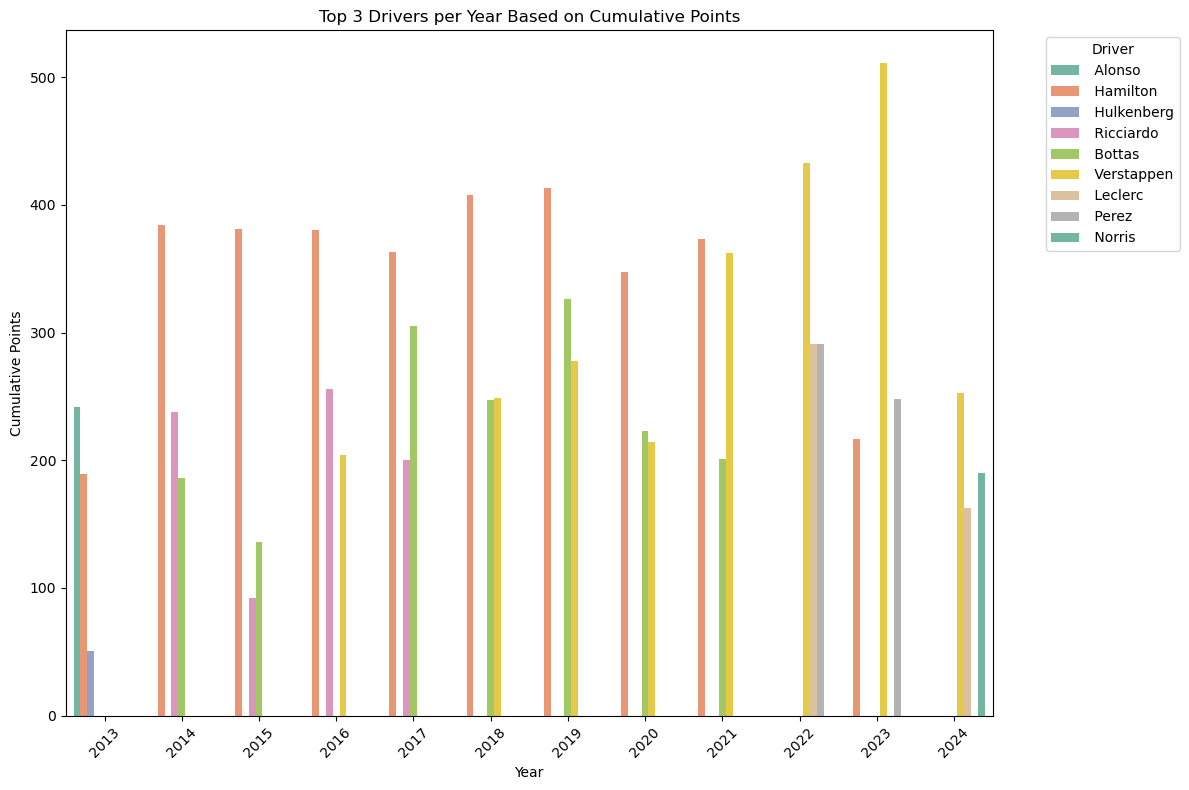

In [16]:
# Aggregate the data to find the top 3 drivers per year based on cumulative points
top_3_per_year = race_data_merged.groupby(['Year', 'Driver']).agg({
    'Cumulative_Pts': 'max'
}).reset_index()

# Sort by year and cumulative points to get the top 3
top_3_per_year = top_3_per_year.sort_values(['Year', 'Cumulative_Pts'], ascending=[True, False])

# For each year, get the top 3 drivers
top_3_per_year = top_3_per_year.groupby('Year').head(3).reset_index(drop=True)

# Plot the top 3 drivers per year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Cumulative_Pts', hue='Driver', data=top_3_per_year, palette='Set2')

# Add labels and title
plt.title('Top 3 Drivers per Year Based on Cumulative Points')
plt.xlabel('Year')
plt.ylabel('Cumulative Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

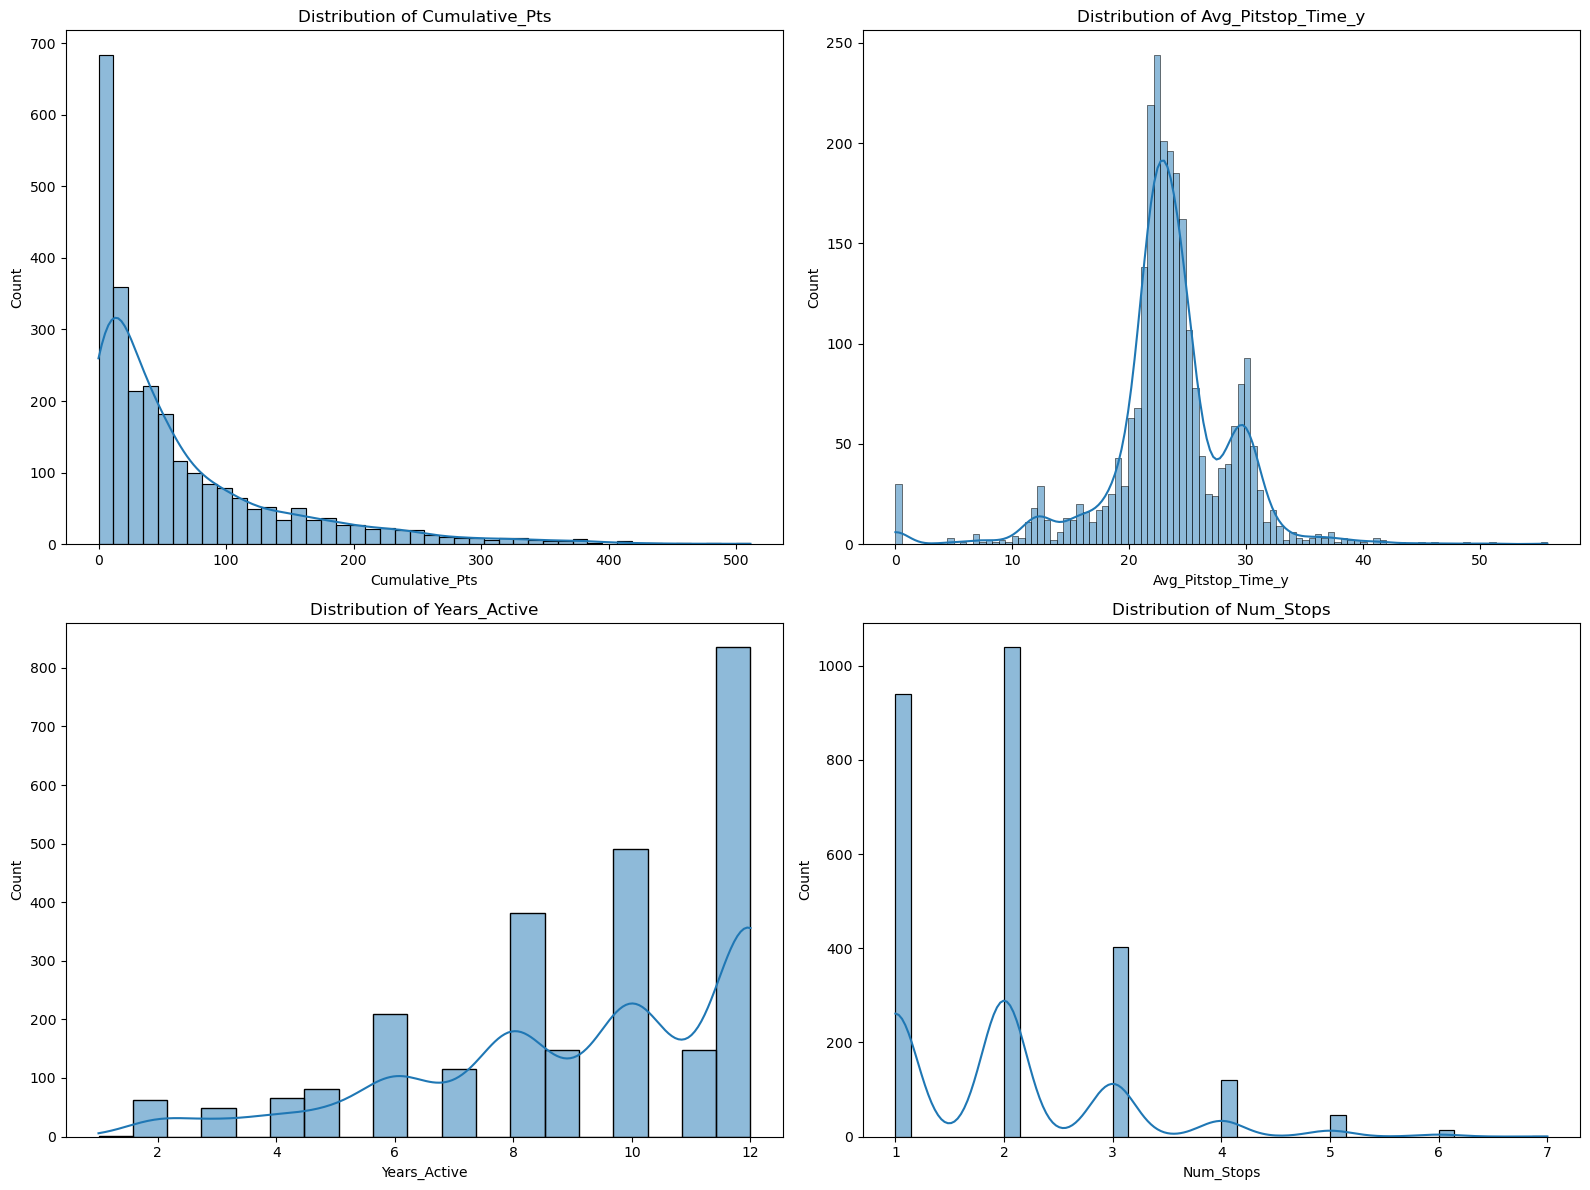

In [17]:
features_to_plot = ['Cumulative_Pts', 'Avg_Pitstop_Time_y', 'Years_Active', 'Num_Stops']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(race_data_merged[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [18]:
# Define the target variable: 1 for Top 3 finish, 0 for Not Top 3
target = (race_data_merged['Pos'] <= 3).astype(int)

#### Correlation Matrix and Heatmap

C:\Users\saumy\AppData\Local\Temp\ipykernel_34376\3458121454.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = race_data_merged.corr()


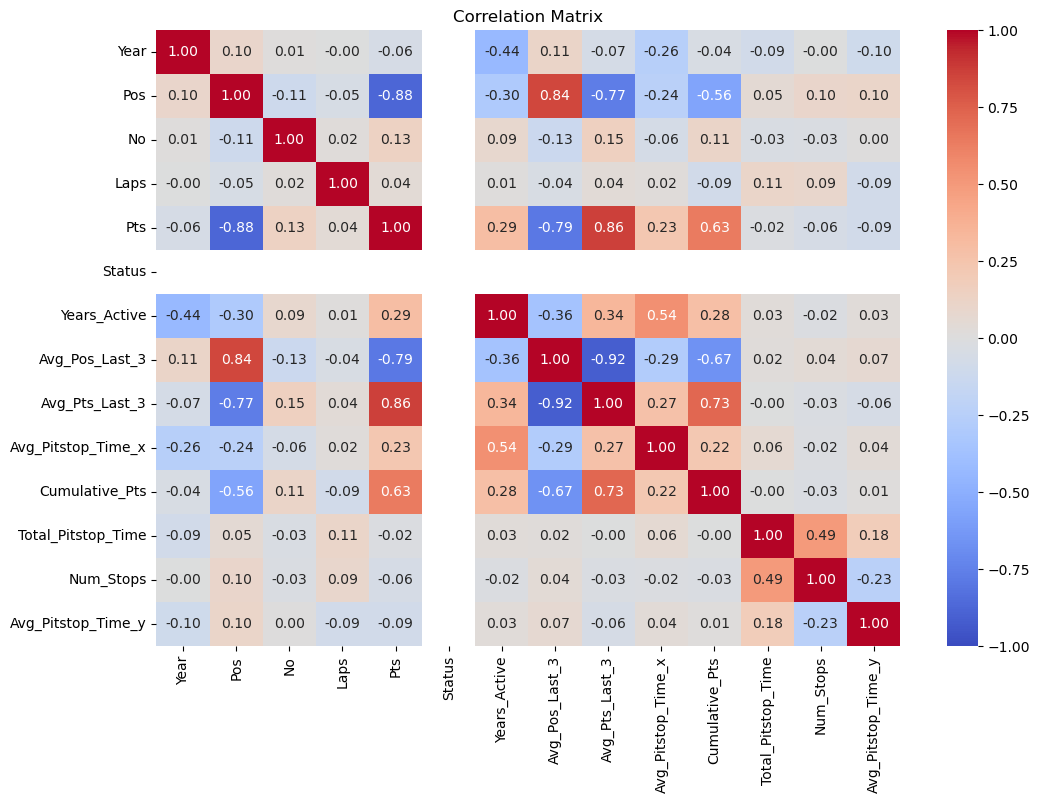

In [19]:
# Compute the correlation matrix
corr_matrix = race_data_merged.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Define the target variable: 1 for Top 3 finish, 0 for Not Top 3
target = (race_data_merged['Pos'] <= 3).astype(int)


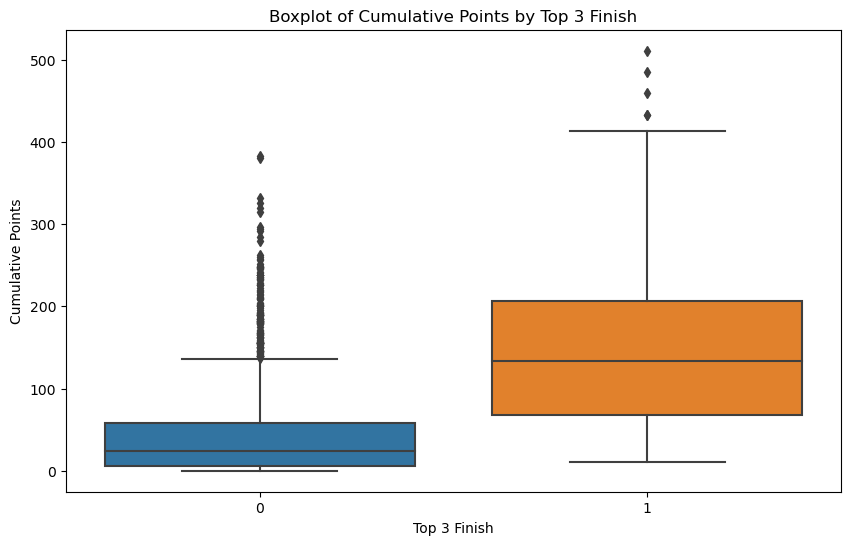

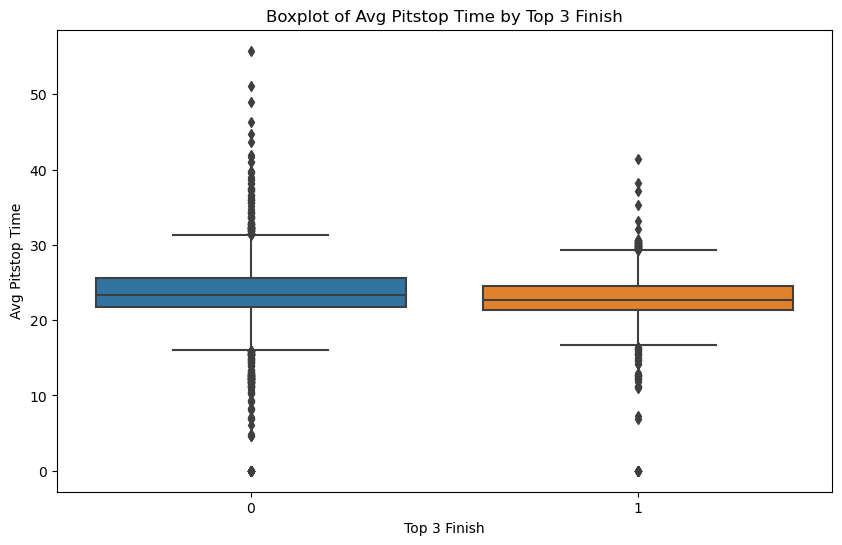

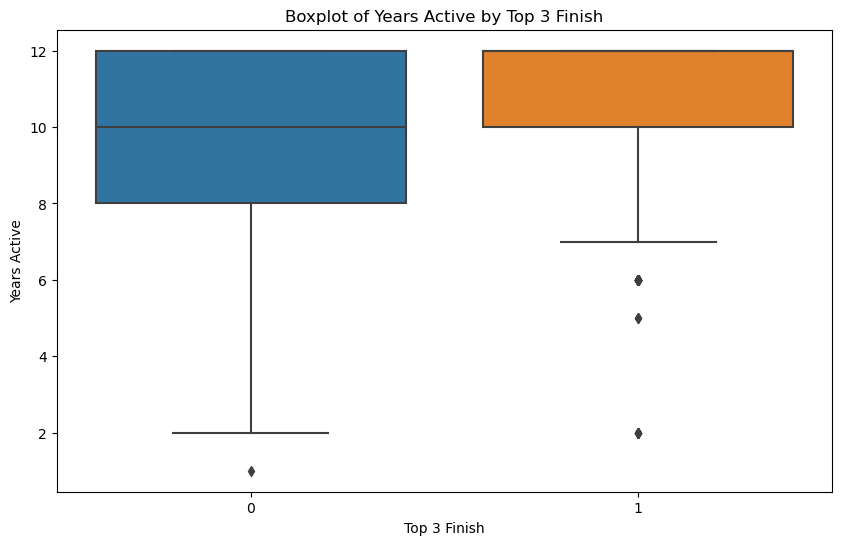

In [20]:
# Boxplot for Cumulative Points
plt.figure(figsize=(10, 6))
sns.boxplot(x=target, y='Cumulative_Pts', data=race_data_merged)
plt.title('Boxplot of Cumulative Points by Top 3 Finish')
plt.xlabel('Top 3 Finish')
plt.ylabel('Cumulative Points')
plt.show()

# Boxplot for Avg Pitstop Time
plt.figure(figsize=(10, 6))
sns.boxplot(x=target, y='Avg_Pitstop_Time_y', data=race_data_merged)
plt.title('Boxplot of Avg Pitstop Time by Top 3 Finish')
plt.xlabel('Top 3 Finish')
plt.ylabel('Avg Pitstop Time')
plt.show()

# Boxplot for Years Active
plt.figure(figsize=(10, 6))
sns.boxplot(x=target, y='Years_Active', data=race_data_merged)
plt.title('Boxplot of Years Active by Top 3 Finish')
plt.xlabel('Top 3 Finish')
plt.ylabel('Years Active')
plt.show()

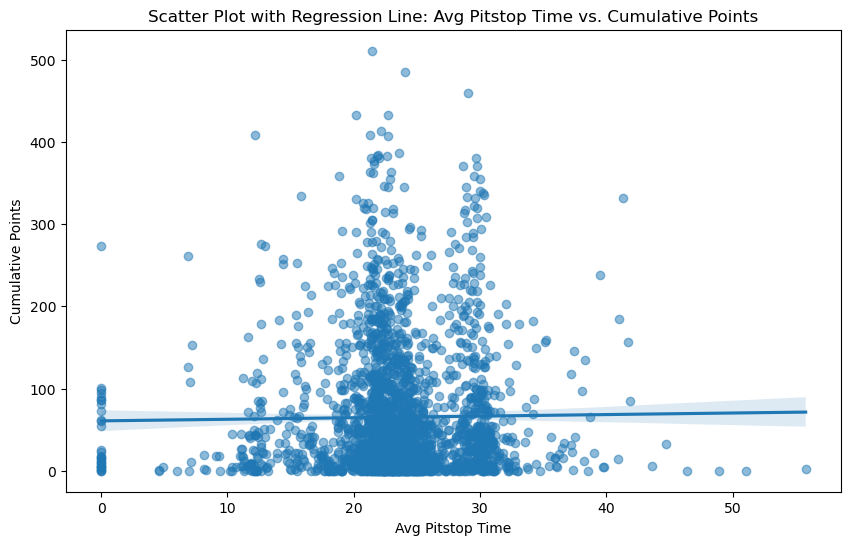

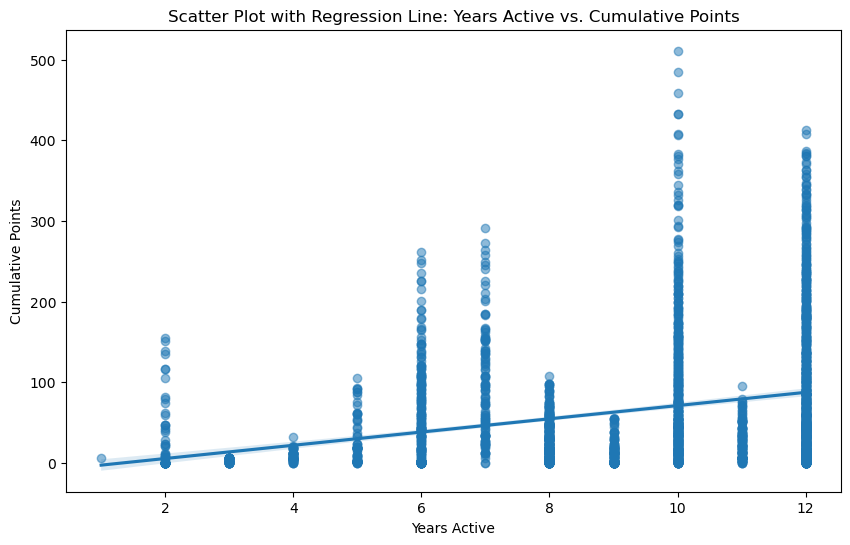

In [21]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Avg_Pitstop_Time_y', y='Cumulative_Pts', data=race_data_merged, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Avg Pitstop Time vs. Cumulative Points')
plt.xlabel('Avg Pitstop Time')
plt.ylabel('Cumulative Points')
plt.show()

# Scatter plot with a different combination
plt.figure(figsize=(10, 6))
sns.regplot(x='Years_Active', y='Cumulative_Pts', data=race_data_merged, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Years Active vs. Cumulative Points')
plt.xlabel('Years Active')
plt.ylabel('Cumulative Points')
plt.show()

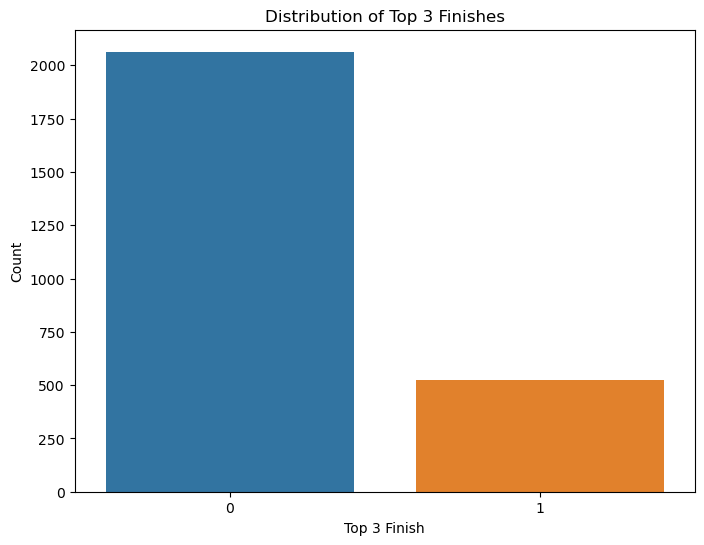

In [22]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target, data=race_data_merged)
plt.title('Distribution of Top 3 Finishes')
plt.xlabel('Top 3 Finish')
plt.ylabel('Count')
plt.show()

# Data Preprocessing and Feature Engineering

This section focuses on removing outliers, transforming the data using logarithmic scaling, and handling potential data anomalies through capping and imputation. Following this, we split the dataset into training and test sets, scale the features, and prepare the data for model training.

## Removing Outliers and Data Transformation
We remove outliers from key variables like `Cumulative_Pts` and `Avg_Pitstop_Time_y` to ensure cleaner data. We also apply logarithmic scaling to `Cumulative_Pts` to reduce skewness in the distribution.

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

race_data_cleaned = remove_outliers(race_data_merged, 'Cumulative_Pts')
race_data_cleaned = remove_outliers(race_data_cleaned, 'Avg_Pitstop_Time_y')

In [24]:
race_data_merged['Log_Cumulative_Pts'] = np.log1p(race_data_merged['Cumulative_Pts'])

## Capping Extreme Outliers
Instead of removing extreme values, we cap them to limit the influence of extreme data points while preserving important information.

In [25]:
def cap_floor(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

race_data_merged = cap_floor(race_data_merged, 'Avg_Pitstop_Time_y')

# Splitting Data into Training and Testing Sets
Now, we define the features and target variable, split the data into training and test sets, and scale the features to ensure uniformity before model training.

In [26]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['Years_Active', 'Avg_Pos_Last_3', 'Avg_Pts_Last_3', 
            'Avg_Pitstop_Time_y', 'Cumulative_Pts', 'Total_Pitstop_Time', 'Num_Stops', 'Status']
target = (race_data_merged['Pos'] <= 3).astype(int)  # 1 for Top 3, 0 for Not Top 3

# Split the data
X_train, X_test, y_train, y_test = train_test_split(race_data_merged[features], target, test_size=0.3, random_state=42)

# Check the split
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 1810
Testing samples: 777


# Feature Scaling
We scale the features using `StandardScaler` to ensure that all variables contribute equally to the model, avoiding bias toward variables with larger ranges.

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

Here we train a `RandomForestClassifier` on the training data and evaluate its performance on the test data. We also apply hyperparameter tuning using `GridSearchCV` to find the best parameters for the model.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8893178893178894
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       614
           1       0.78      0.66      0.72       163

    accuracy                           0.89       777
   macro avg       0.85      0.81      0.82       777
weighted avg       0.89      0.89      0.89       777



## Hyperparameter Tuning with GridSearchCV
We apply `GridSearchCV` to tune the Random Forest hyperparameters to optimize the model's performance.

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.8922651933701656
Accuracy: 0.8983268983268984
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       614
           1       0.80      0.69      0.74       163

    accuracy                           0.90       777
   macro avg       0.86      0.82      0.84       777
weighted avg       0.89      0.90      0.90       777



In [30]:
print(X_train.isnull().sum())

Years_Active           0
Avg_Pos_Last_3         0
Avg_Pts_Last_3         0
Avg_Pitstop_Time_y    16
Cumulative_Pts         0
Total_Pitstop_Time    16
Num_Stops             16
Status                 0
dtype: int64


# Handling Missing Values and Imputation

This section deals with missing values in the dataset using the `SimpleImputer`, followed by balancing the dataset with SMOTE to address any class imbalance.

In [31]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [32]:
# Assuming you want to check the imputed training data
print(pd.DataFrame(X_train_imputed).isnull().sum())

# Or if you want to check the scaled training data
print(pd.DataFrame(X_train_scaled).isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
0     0
1     0
2     0
3    16
4     0
5    16
6    16
7     0
dtype: int64


In [33]:
from sklearn.impute import SimpleImputer

# For imputation
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [34]:
# To drop rows with missing values
X_train_cleaned = pd.DataFrame(X_train_scaled).dropna()
X_test_cleaned = pd.DataFrame(X_test_scaled).dropna()

# To drop columns with missing values
X_train_cleaned = pd.DataFrame(X_train_scaled).dropna(axis=1)
X_test_cleaned = pd.DataFrame(X_test_scaled).dropna(axis=1)

In [35]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the imputed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

In [36]:
# Drop rows with any missing values
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

# Apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_dropped, y_train_dropped)

In [37]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the imputed and scaled training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

print(f"Original training set size: {X_train.shape[0]}")
print(f"Resampled training set size: {X_train_resampled.shape[0]}")

Original training set size: 1810
Resampled training set size: 2900


In [38]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy, e.g., 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Check again for any NaN values after imputation
print(pd.DataFrame(X_train_imputed).isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [39]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy, e.g., mean
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8944658944658944
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       614
           1       0.73      0.80      0.76       163

    accuracy                           0.89       777
   macro avg       0.84      0.86      0.85       777
weighted avg       0.90      0.89      0.90       777



# Threshold Tuning for Optimal Model Performance
We evaluate the model at different thresholds to find the one that offers the best balance of precision, recall, and overall performance.

In [41]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predict probabilities for the positive class (Top 3 finish)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 0.9, 0.05)

# Store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

for threshold in thresholds:
    # Apply the threshold to get predictions
    y_pred_threshold = (y_probs >= threshold).astype(int)
    
    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    
    # Store the metrics
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Print the results
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f} | Precision: {precision_scores[i]:.4f} | Recall: {recall_scores[i]:.4f} | F1-Score: {f1_scores[i]:.4f} | Accuracy: {accuracy_scores[i]:.4f}")

Threshold: 0.10 | Precision: 0.4893 | Recall: 0.9816 | F1-Score: 0.6531 | Accuracy: 0.7812
Threshold: 0.15 | Precision: 0.5474 | Recall: 0.9571 | F1-Score: 0.6964 | Accuracy: 0.8250
Threshold: 0.20 | Precision: 0.5827 | Recall: 0.9509 | F1-Score: 0.7226 | Accuracy: 0.8468
Threshold: 0.25 | Precision: 0.6120 | Recall: 0.9387 | F1-Score: 0.7409 | Accuracy: 0.8623
Threshold: 0.30 | Precision: 0.6520 | Recall: 0.9080 | F1-Score: 0.7590 | Accuracy: 0.8790
Threshold: 0.35 | Precision: 0.6636 | Recall: 0.8712 | F1-Score: 0.7533 | Accuracy: 0.8803
Threshold: 0.40 | Precision: 0.6780 | Recall: 0.8528 | F1-Score: 0.7554 | Accuracy: 0.8842
Threshold: 0.45 | Precision: 0.7128 | Recall: 0.8221 | F1-Score: 0.7635 | Accuracy: 0.8932
Threshold: 0.50 | Precision: 0.7263 | Recall: 0.7975 | F1-Score: 0.7602 | Accuracy: 0.8945
Threshold: 0.55 | Precision: 0.7349 | Recall: 0.7485 | F1-Score: 0.7416 | Accuracy: 0.8906
Threshold: 0.60 | Precision: 0.7516 | Recall: 0.7239 | F1-Score: 0.7375 | Accuracy: 0.8919

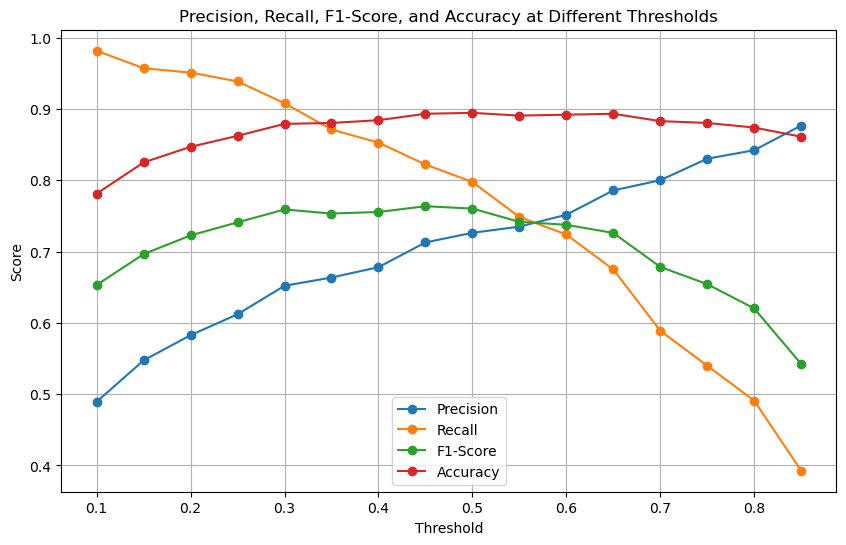

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
plt.plot(thresholds, accuracy_scores, label='Accuracy', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score, and Accuracy at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Choose the optimal threshold (for example, let's assume 0.4)
optimal_threshold = 0.4
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Evaluate the final model performance
print("Final Model Performance at Optimal Threshold:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimal))
print("Classification Report:\n", classification_report(y_test, y_pred_optimal))

Final Model Performance at Optimal Threshold:
Accuracy: 0.8854568854568855
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       614
           1       0.68      0.86      0.76       163

    accuracy                           0.89       777
   macro avg       0.82      0.88      0.84       777
weighted avg       0.90      0.89      0.89       777



In [44]:
import joblib

# Save the model
joblib.dump(model, 'final_rf_model.pkl')

# Save the scaler if used
joblib.dump(scaler, 'scaler.pkl')

# Save the imputer
joblib.dump(imputer, 'imputer.pkl')

# Save the threshold value
with open('threshold.txt', 'w') as f:
    f.write(str(optimal_threshold))

In [45]:
def get_top_3_active_drivers(grand_prix_name, race_data, features):
    # Filter the data for the specified Grand Prix
    grand_prix_data = race_data[race_data['Grandprix'] == grand_prix_name]
    
    # Further filter to include only active drivers
    grand_prix_data = grand_prix_data[grand_prix_data['Status'] == 1]
    
    # Handle potential duplicates: Keep the latest entry or aggregate features
    # Assuming 'Year' exists and you want the latest year for each driver:
    grand_prix_data = grand_prix_data.sort_values(by='Year', ascending=False).drop_duplicates(subset=['Driver'])
    
    # Check if there are any entries for the specified Grand Prix
    if grand_prix_data.empty:
        print(f"No data available for active drivers in the Grand Prix: {grand_prix_name}")
        return
    
    # Impute and scale the data
    grand_prix_data_imputed = imputer.transform(grand_prix_data[features])
    grand_prix_data_scaled = scaler.transform(grand_prix_data_imputed)
    
    # Predict probabilities
    predicted_probs = model.predict_proba(grand_prix_data_scaled)[:, 1]
    
    # Add the probabilities to the DataFrame
    grand_prix_data['Top_3_Probability'] = predicted_probs
    
    # Sort the drivers by their probability of finishing in the top 3
    sorted_drivers = grand_prix_data.sort_values(by='Top_3_Probability', ascending=False)
    
    # Select the top 3 drivers
    top_3_drivers = sorted_drivers.head(3)
    
    # Display the top 3 drivers with their probabilities
    print(f"Top 3 Predicted Active Drivers for {grand_prix_name}:")
    print(top_3_drivers[['Driver', 'Top_3_Probability', 'Grandprix']])
    
    return top_3_drivers

# Run the updated function for the Monaco Grand Prix
grand_prix_name = "Circuit de Monaco, Monaco"
top_3_predicted_monaco_active = get_top_3_active_drivers(grand_prix_name, race_data_merged, features)

Top 3 Predicted Active Drivers for Circuit de Monaco, Monaco:
           Driver  Top_3_Probability                  Grandprix
1102      Leclerc               0.87  Circuit de Monaco, Monaco
2578   Verstappen               0.82  Circuit de Monaco, Monaco
2180        Sainz               0.81  Circuit de Monaco, Monaco


C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
